In [10]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Import DataFrame and create Credit Card dataset


 

In [ ]:
# Create credit card dataset
ccard_df =

# Part One: Raw Data Visualizations

<Axes: >

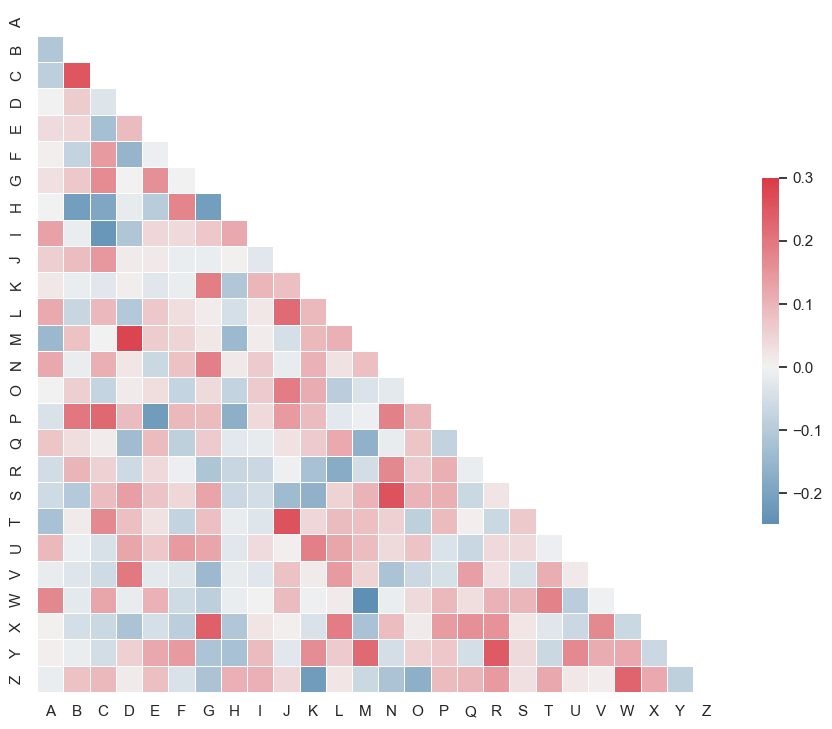

In [15]:
# Compute the Correlation Matrix for Credit Cards

sns.set_theme(style="white")

# Generate random dataset
from string import ascii_letters
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                  columns=list(ascii_letters[26:]))

#Compute the correlation matrix
corr = d.corr()

#Generate mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

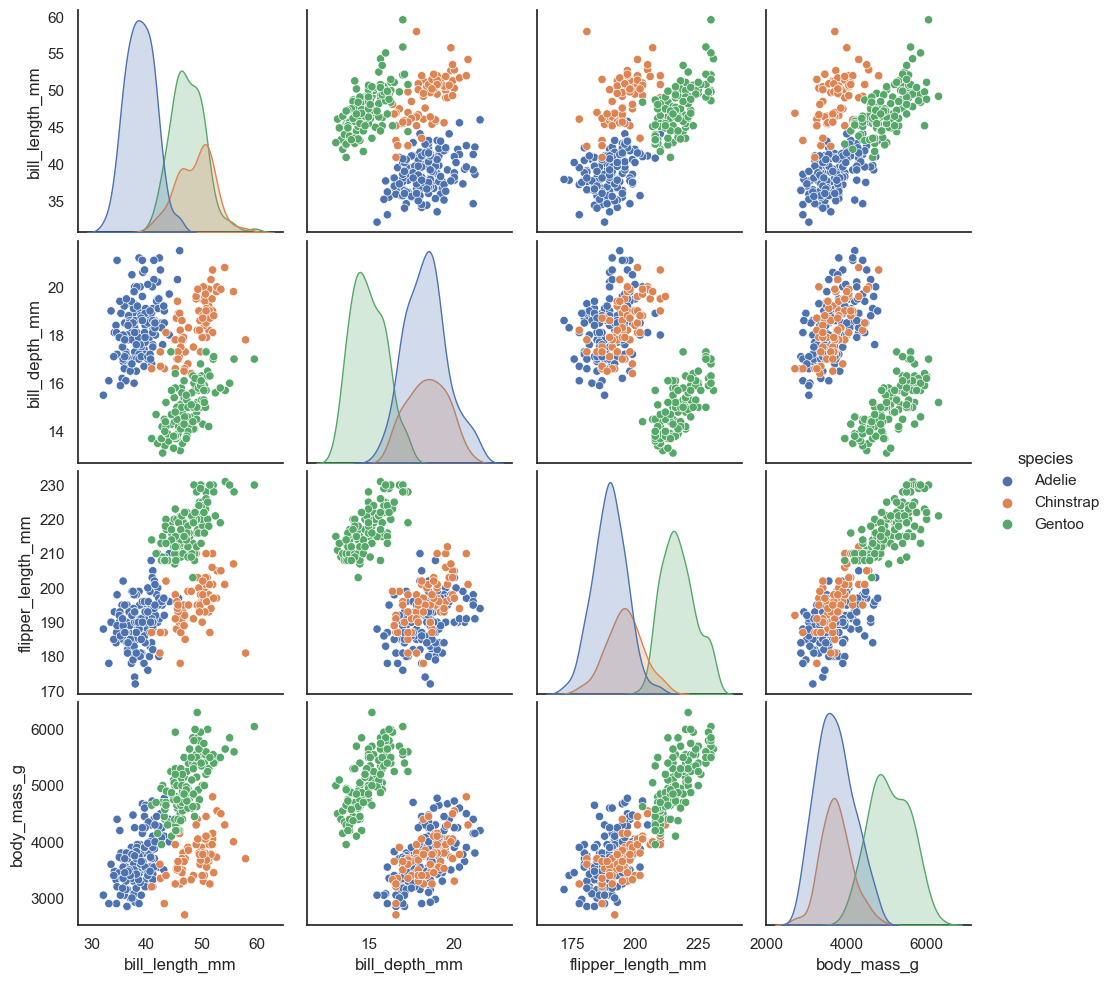

In [18]:
# Create Pair Plots for Credit Cards
# Note: Need to plot the Xs only, not the Y.

# Drop Y from ccards_df, create X table
ccards_X = ccards_df.drop(columns="ccard_co")
ccards_y = ccards_df["ccard_co"]

ccards_X = sns.load_dataset('ccards_X') #insert the table of Xs where 'penguins is'
sns.pairplot(ccards_X)

In [19]:
# Create box plot to see the shape of the Credit Card data
# Note: Include all the X's and the Y

sns.boxplot(
    data=ccards_df, x="ccards_X", y="ccards_y", #data is the ccard_df, X is the table of Xs
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

NameError: name 'titanic' is not defined

# Part Two: Machine Learning Polynomial Regressions

In [ ]:
#Import the necessary dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [ ]:
# Credit Cards Supervised Machine Learning
#Note: assumes ccard_df is the DataFrame

#Review the DataFrame:
display(ccard_df.head())

In [ ]:
# Seperate the y and X variables
y = ccard_df["ccard_co"]
X = ccard_df.drop(columns="ccard_co")

In [ ]:
# train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Use the Bayesian Information Criterion (BIC) to model the goodness of fit (degrees)
degrees = range(1, 11) #range of polynomial degrees
bic_values =[]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(X)
    
    #Scale the polynomial features
    scaler = StandardScaler()
    x_poly_scaled = scaler.fit_transform(x_poly)
    
    #Fit a linear regression model using StatsModels
    X_poly_const = sm.add.constant(X_poly)
    model = sm.OLS(y, X_poly_const).fit()
    bic_values.append(model.bic)

In [ ]:
# Determine the optimal degree for the Polynomial Regression
optimal_degree = degrees[np.argmin(bic_values)]

In [ ]:
# Create a Scikit-learn pipeline to scale the data and apply polynominal regression:

# Instantiate the model with the StandardScaler
model = make_pipeline(StandardScaler(), PolynomialFeatures(optimal_degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Create Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
cc_mse = mean_squared_error(y_test, y_pred)
cc_r2 = rd_score(y_test, y_pred)

print(f'Mean Squared Error: {cc_mse}')
print(f'R-squared: {cc_r2}')

# Part Three: Lag the X data by 6 months and re-run Polynomial Regression

In [ ]:
# Shift the X data by 6 months
X_lagged = X.copy()
X_lagged.index = X_lagged.index - pd.DateOffset(months=6)

# Merge the lagged X data with the original X data
X_with_lag = pd.merge(X, X_lagged, how="left", left_index=True, right_index=True, suffixes=('', '_lagged'))

#Drop rows with NaN values created by the lag
X_with_lag = X_with_lag.dropna()

In [ ]:
# train the lagged data
X_train, X_test, y_train, y_test = train_test_split(X_with_lag, y, random_state=42)

In [ ]:
# Use the BIC to model the goodness of fit (degrees) with the lagged data
degrees = range(1, 11) #range of polynomial degrees
bic_values =[]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(X_lagged)
    
    #Scale the polynomial features
    scaler = StandardScaler()
    x_poly_scaled = scaler.fit_transform(x_poly)
    
    #Fit a linear regression model using StatsModels
    X_poly_const = sm.add.constant(X_poly)
    model = sm.OLS(y, X_poly_const).fit()
    bic_values.append(model.bic)

In [ ]:
# Determine the optimal degree for the Polynomial Regression
optimal_degree = degrees[np.argmin(bic_values)]

# Instantiate the model with the StandardScaler
model = make_pipeline(StandardScaler(), PolynomialFeatures(optimal_degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Create Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
cc_lag_mse = mean_squared_error(y_test, y_pred)
cc_lag_r2 = rd_score(y_test, y_pred)

print(f'Mean Squared Error-lagged: {cc_lage_mse}')
print(f'R-squared-lagged: {cc_lag_r2}')

# Part Four: Plot the results

In [ ]:
#Create df of the results
results_lagged_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Scatterplot with regression line
sns.regplot(x='True Values', y='Predicted Values', data=results_lagged_df, scatter_kws={'s':20}, line_kws={'color':'red'})

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Credit Cards with Lagged Data')

# Display MSE and R-squared values on the plot
plt.text(0.5, 0.9, f"MSE: {mse:.2f}\nR-squared: {r2:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show